In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**DICTIONARY**

- id : Airbnb's unique identifier for the listing.
- name : Name of the listing.
- host_id : Airbnb's unique identifier for the host/user.
- host_name : Name of the host. Usually, just the first name(s).
- neighborhood: The neighborhood is geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.
- latitude : Uses the World Geodetic System (WGS84) projection for latitude.
- longitude : Uses the World Geodetic System (WGS84) projection for longitude.
- room_type : [Entire home/apt |Private room| Shared room| Hotel]
  All homes are grouped into the following three room types:

  <font color='orange'>_Entire place (Apartement)_

  - Entire places are best if you're seeking a home away from home. With an entire place, you'll have the whole space to yourself. This usually includes a bedroom, a bathroom, a kitchen, and a separate, dedicated entrance. Hosts should note in the description if they'll be on the property or not (ex: "Host occupies the first floor of the home") and provide further details on the listing.

  _Private rooms_

  - Private rooms are great for when you prefer a little privacy, and still value a local connection. When you book a private room, you'll have your private room for sleeping and may share some spaces with others. You might need to walk through indoor spaces that another host or guest may occupy to get to your room.

  _Hotel rooms_

  - Whether private or shared, hotel rooms provide a level of service and hospitality associated with traditional hotels. The rooms are available in boutique or lifestyle hotels, hostels, bed and breakfasts, or similar properties. They typically include vibrant common areas and rooms with unique touches.

  _Shared rooms_

  - Shared rooms are for when you don't mind sharing a space with others. When you book a shared room, you'll be sleeping in a space that is shared with others and share the entire space with other people. Shared rooms are popular among flexible travelers looking for new friends and budget-friendly
    stays.</font>

- minimum_nights : The minimum number of night stays for the listing (calendar rules may differ).
- number_of_reviews : The number of reviews the listing has.
- last_review : The date of the last/newest review. calculated_host_listings_count : The number of listings the host has in the current scrape in the city/region geography.
- availability_365 : Avaliability_x. The calendar determines the availability of the listing x days in the future. Note a listing may be available because it has been booked by a guest or blocked by the host.
- number_of_reviews_ltm : The number of reviews the listing has (in the last 12 months).


BACKGROUND

- The Bangkok branch of AIR BnB, a company specializing in temporary property rentals, is hiring a data science expert to identify issues found through Bangkok's listing data. This data will be utilized by the CMO (Chief Marketing Officer) to improve the app's ratings, surpass competitors, and determine marketing strategies that can enhance the appeal of various property types to potential renters.


**PROBLEM HYPOTHESES:**

1. Some listings do not have accommodation names, and the application allows it.
2. There are accommodations with availability set to 0, indicating that they cannot be rented.
3. There are duplicate data that may lead to users experiencing missing data.
4. There is a significant decrease in the number of reviews in the year 2021.
5. There are properties with a low number of reviews despite having a large number of listings.


In [2]:
# Make sure the CSV file path is specified correctly based on your dataset location in Kaggle
file_path = '/kaggle/input/air-bnb-listing-bangkok/Airbnb Listings Bangkok.csv'

# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the data has been loaded correctly
print(data.head())


   Unnamed: 0      id                                            name  \
0           0   27934                 Nice room with superb city view   
1           1   27979                  Easy going landlord,easy place   
2           2   28745               modern-style apartment in Bangkok   
3           3   35780  Spacious one bedroom at The Kris Condo Bldg. 3   
4           4  941865                      Suite Room 3 at MetroPoint   

   host_id   host_name neighbourhood  latitude  longitude        room_type  \
0   120437      Nuttee   Ratchathewi  13.75983  100.54134  Entire home/apt   
1   120541         Emy       Bang Na  13.66818  100.61674     Private room   
2   123784  Familyroom     Bang Kapi  13.75232  100.62402     Private room   
3   153730     Sirilak     Din Daeng  13.78823  100.57256     Private room   
4   610315       Kasem     Bang Kapi  13.76872  100.63338     Private room   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0   1905      

---


# _CLEANING_


---


In [3]:
# data unik di tiap kolom
listItem = []
for col in data.columns :
    listItem.append( [col, data[col].nunique(), data[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Unnamed: 0,15854,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,id,15854,"[27934, 27979, 28745, 35780, 941865, 1704776, ..."
2,name,14794,"[Nice room with superb city view, Easy going l..."
3,host_id,6659,"[120437, 120541, 123784, 153730, 610315, 21296..."
4,host_name,5313,"[Nuttee, Emy, Familyroom, Sirilak, Kasem, Wimo..."
5,neighbourhood,50,"[Ratchathewi, Bang Na, Bang Kapi, Din Daeng, B..."
6,latitude,9606,"[13.75983, 13.66818, 13.75232, 13.78823, 13.76..."
7,longitude,10224,"[100.54134, 100.61674, 100.62402, 100.57256, 1..."
8,room_type,4,"[Entire home/apt, Private room, Hotel room, Sh..."
9,price,3040,"[1905, 1316, 800, 1286, 1000, 1558, 1461, 700,..."


In [4]:
# Mengecek nilai NaN

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15854 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

In [5]:
# Mengecek data type setiap kolom

data.isna().sum()

Unnamed: 0                           0
id                                   0
name                                 8
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [6]:
# Removing the column Unnamed:0 as it is the same as the index.

data.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
# Creating a new column (last_review (Year)) to facilitate creating time series graphs.

data['last_review (Year)']=data['last_review'].apply(lambda x: str(x)[:4])

In [8]:
# Change column (last_review (Year)) to date time

data['last_review']=pd.to_datetime(data['last_review'])
data['last_review (Year)']=pd.to_datetime(data['last_review (Year)'])

In [9]:
# The data type of the column "last review" has been changed to datetime.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              15854 non-null  int64         
 1   name                            15846 non-null  object        
 2   host_id                         15854 non-null  int64         
 3   host_name                       15854 non-null  object        
 4   neighbourhood                   15854 non-null  object        
 5   latitude                        15854 non-null  float64       
 6   longitude                       15854 non-null  float64       
 7   room_type                       15854 non-null  object        
 8   price                           15854 non-null  int64         
 9   minimum_nights                  15854 non-null  int64         
 10  number_of_reviews               15854 non-null  int64         
 11  la

# Checking for duplicate data.


Selection of columns longitude and latitude is because the geographical location of a building is unlikely to be the same.

- Then, it is filtered based on its room type, and it turns out that there is a room type called 'private room', which means one house with multiple rooms rented out separately with different names, indicating different properties.
- To address this issue, the data needs to be filtered again based on last_review, price, and name, as when these three columns are the same, it can be confirmed that the properties listed for rent are the same property.


In [10]:
data_duplicate = data[data.duplicated(subset=['longitude', 'latitude','last_review','price','name','room_type'])]
display(len(data_duplicate))
data_duplicate


14

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,last_review (Year)
5976,28907857,NA BANGLAMPOO GUEST HOUSE,87704107,Yui,Phra Nakhon,13.762790,100.497900,Private room,1400,1,0,NaT,NaN,9,361,0,NaT
8790,37954129,small1,97598307,Soo,Don Mueang,13.920720,100.575780,Shared room,350,1,0,NaT,NaN,4,180,0,NaT
15121,767128654727724698,Sathon Luxury Loft/China Town/Icon Siam,276781306,Alex,Sathon,13.710777,100.519891,Entire home/apt,1580,1,0,NaT,NaN,13,339,0,NaT
15144,767945912006659422,Sathon Luxury Loft/China Town/Icon Siam,344327171,Alice,Sathon,13.710777,100.519891,Entire home/apt,1580,1,0,NaT,NaN,40,339,0,NaT
15186,765691389894680033,Sathon Luxury 2 br/China Town/Icon Siam,264864968,Tricia,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,NaT,NaN,44,340,0,NaT
15190,765716244664642439,Sathon Luxury 2 br/China Town/Icon Siam,344327171,Alice,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,NaT,NaN,40,340,0,NaT
15191,765721954905526928,Sathon Luxury 2 br/China Town/Icon Siam,344327171,Alice,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,NaT,NaN,40,340,0,NaT
15192,765728211212001811,Sathon Luxury 2 br/China Town/Icon Siam,276781306,Alex,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,NaT,NaN,13,340,0,NaT
15195,765781484209218358,Sathon Luxury 2 br/China Town/Icon Siam,20133201,Willam,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,NaT,NaN,33,340,0,NaT
15371,775777794097427183,New! Gateway/ Bangkok University 1BR 2PPL near...,52161947,Noons,Khlong Toei,13.716669,100.584967,Entire home/apt,2976,1,0,NaT,NaN,99,362,0,NaT


In [ ]:
# Drop Duplicate Data

# data.drop_duplicates(subset=['longitude', 'latitude','last_review','price','name','room_type'], keep='first', inplace=True, ignore_index=False)

#Duplicate data will be dropped after the analysis is completed.

In [12]:
# Filling the NaN values in the column "reviews_per_month" with 0.

data['reviews_per_month'].fillna(value=0,inplace=True)

In [13]:
# Viewing the NaN values.

data.isna().sum()

id                                   0
name                                 8
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
last_review (Year)                5790
dtype: int64

In [14]:
# Displaying the "name" column that has NaN values.

data[data['name'].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,last_review (Year)
439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaT,0.00,1,365,0,NaT
544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaT,0.00,1,365,0,NaT
572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaT,0.00,1,365,0,NaT
669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaT,0.00,1,365,0,NaT
1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaT,0.00,1,365,0,NaT
1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0,2017-01-01
1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaT,0.00,1,365,0,NaT
2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0,2017-01-01


In [15]:
# FINDING OTHERS PROPERTIES OWNED BY HOST NAME: PAKAPHOL

data[data['host_name']=='Pakaphol']

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,last_review (Year)
1981,13400326,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72427,100.56443,Private room,950,1,1,2020-02-19,0.03,3,1,0,2020-01-01
1982,13400758,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72373,100.56415,Private room,36363,1,0,NaT,0.00,3,1,0,NaT
2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0,2017-01-01


There are 8 rows of data that have NaN values in the "name" column.

- 5 of them are owned by different hosts, each having only 1 property, so their property ownership cannot be checked.
- 1 of them has 6 reviews, but it still needs to be analyzed as the hotel name is missing, although users may trust it to make a reservation.
- 1 of them has more than 1 property, so it can be checked. It turns out that the other 2 properties have the same accommodation name, so the NaN hotel name is replaced with the existing hotel name.


In [16]:
# Replacing the NaN values in the "host_name" column with the name "Pakaphol."

data.loc[data['host_name']=='Pakaphol', 'name'] = data.loc[data['host_name']=='Pakaphol', 'name'].fillna('Errday Guest House')

In [17]:
# Checking the NaN values after they have been replaced.

data[data['host_name']=='Pakaphol']

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,last_review (Year)
1981,13400326,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72427,100.56443,Private room,950,1,1,2020-02-19,0.03,3,1,0,2020-01-01
1982,13400758,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72373,100.56415,Private room,36363,1,0,NaT,0.00,3,1,0,NaT
2075,13142743,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0,2017-01-01


In [18]:
# The "name" column that still has NaN values will not be dropped because it will be one of the issues to be discussed in the analysis.

# data.dropna(subset=['name'],inplace=True)

# Creating a new column "price per night"

The assumption previously made was that the "price" column in this data is the result of multiplication between "price per night" and "minimum night," so a new column needs to be created to display the price per night. However, upon examining the data, there are many prices that are not reasonable (very cheap) if we assume that the price is the result of multiplication with "minimum night." Therefore, the existing price in the data is set to be the price per night.

**NOTE**

- 1 baht = Rp 429.88 (exchange rate as of 9/6/2023)
- The maximum reasonable price per night is 20 million rupiah or about 46,524 baht.
- The minimum reasonable price per night is 50 thousand rupiah or about 116 baht.


In [19]:
data['price_per_night']=data['price']/data['minimum_nights']

In [20]:
#Displaying properties with prices above the maximum reasonable price per night.
max_price=data[data['price']>46524]
# display(max_price)
print(f'The number of properties that have prices above the maximum reasonable price per night is {len(max_price)}')

The number of properties that have prices above the maximum reasonable price per night is 63


In [21]:
min_price=data[data['price_per_night']<116]
# display(min_price)
print(f'The number of properties that have prices above the minimum reasonable price per night is {len(min_price)}')

The number of properties that have prices above the minimum reasonable price per night is 3426


In [22]:
# DROP KOLOM PRICE PER NIGHT

data.drop(columns='price_per_night',axis=1,inplace=True)

In [23]:
# Detecting columns that have a value of 0.

for column in data.columns:
    if 0 in data[column].values:
        print(f"Kolom {column} that have a value of 0.")


Kolom price that have a value of 0.
Kolom number_of_reviews that have a value of 0.
Kolom reviews_per_month that have a value of 0.
Kolom availability_365 that have a value of 0.
Kolom number_of_reviews_ltm that have a value of 0.


In [24]:
# Dropping the rows where the price has a value of 0 because it is considered an anomaly (accommodation price cannot be set to 0).

data.drop(data[data['price'] == 0].index, inplace=True)


In [25]:
# Detecting columns that have a value of 0 after the rows with 0 values have been dropped.

for column in data.columns:
    if 0 in data[column].values:
        print(f"Kolom {column} that have a value of 0.")

Kolom number_of_reviews that have a value of 0.
Kolom reviews_per_month that have a value of 0.
Kolom availability_365 that have a value of 0.
Kolom number_of_reviews_ltm that have a value of 0.


# Display The Outliers


<Axes: xlabel='price', ylabel='room_type'>

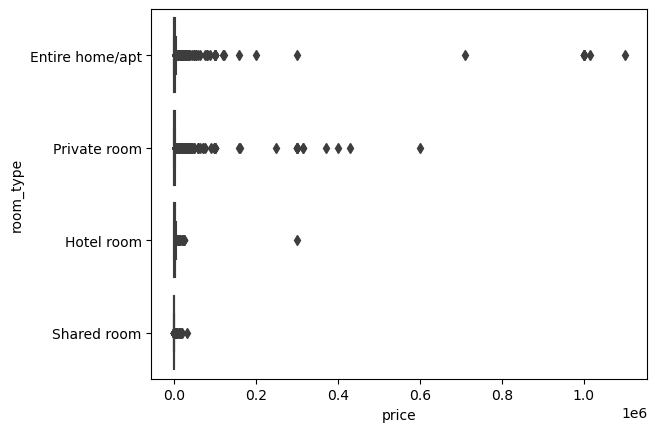

In [26]:
sns.boxplot(data=data,x='price',y='room_type')

**ANALYSIS**

From the boxplot graph above, it can be seen that there are outliers in the property prices for entire home/apartments, private rooms, and hotel rooms. This is because there are very high prices, but in this case, it is for accommodation listings, which means the price of the accommodation can be set by the property owner based on their preferences. Therefore, the removal of outlier data is not needed.


# Creating a new DataFrame for each model_type.


In [27]:
df_apart=data[data['room_type']=='Entire home/apt'].sort_values('price',ascending=False)
df_private=data[data['room_type']=='Private room'].sort_values('price',ascending=False)
df_hotel=data[data['room_type']=='Hotel room'].sort_values('price',ascending=False)
df_shared=data[data['room_type']=='Shared room'].sort_values('price',ascending=False)

# display(df_apart.head())
# display(df_private.head())
# display(df_hotel.head())
# display(df_shared.head())


# **ANALYSIS**


---


# **1. There are Duplicate Data**


In [28]:
data_duplicate = data[data.duplicated(subset=['longitude', 'latitude','last_review','price','name','room_type'])]
display(data_duplicate)
print(f'The number of identical properties is {len(data_duplicate)} property')

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,last_review (Year)
5976,28907857,NA BANGLAMPOO GUEST HOUSE,87704107,Yui,Phra Nakhon,13.762790,100.497900,Private room,1400,1,0,NaT,0.0,9,361,0,NaT
8790,37954129,small1,97598307,Soo,Don Mueang,13.920720,100.575780,Shared room,350,1,0,NaT,0.0,4,180,0,NaT
15121,767128654727724698,Sathon Luxury Loft/China Town/Icon Siam,276781306,Alex,Sathon,13.710777,100.519891,Entire home/apt,1580,1,0,NaT,0.0,13,339,0,NaT
15144,767945912006659422,Sathon Luxury Loft/China Town/Icon Siam,344327171,Alice,Sathon,13.710777,100.519891,Entire home/apt,1580,1,0,NaT,0.0,40,339,0,NaT
15186,765691389894680033,Sathon Luxury 2 br/China Town/Icon Siam,264864968,Tricia,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,NaT,0.0,44,340,0,NaT
15190,765716244664642439,Sathon Luxury 2 br/China Town/Icon Siam,344327171,Alice,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,NaT,0.0,40,340,0,NaT
15191,765721954905526928,Sathon Luxury 2 br/China Town/Icon Siam,344327171,Alice,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,NaT,0.0,40,340,0,NaT
15192,765728211212001811,Sathon Luxury 2 br/China Town/Icon Siam,276781306,Alex,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,NaT,0.0,13,340,0,NaT
15195,765781484209218358,Sathon Luxury 2 br/China Town/Icon Siam,20133201,Willam,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,NaT,0.0,33,340,0,NaT
15371,775777794097427183,New! Gateway/ Bangkok University 1BR 2PPL near...,52161947,Noons,Khlong Toei,13.716669,100.584967,Entire home/apt,2976,1,0,NaT,0.0,99,362,0,NaT


The number of identical properties is 14 property


In [29]:
data_duplicate.groupby(['name','latitude','longitude','host_name'])[['id']].count()

id
name                                               latitude  longitude  host_name    
Family Room for 4 People                           13.740168 100.556320 Rachan      1
Luxury 1 Bed/Central Rama9/Jodds Fair/Phra ram9    13.756184 100.568269 Tricia      1
                                                                        Willam      1
                                                   13.757097 100.568486 Alice       1
NA BANGLAMPOO GUEST HOUSE                          13.762790 100.497900 Yui         1
New! Gateway/ Bangkok University 1BR 2PPL near BTS 13.716669 100.584967 Noons       1
Sathon Luxury 2 br/China Town/Icon Siam            13.710777 100.519891 Alex        1
                                                                        Alice       2
                                                                        Tricia      1
                                                                        Willam      1
Sathon Luxury Loft/China Town/Icon Siam            13.710777 100.519891 Alex        1
                                                                        Alice       1
small1                                             13.920720 100.575780 Soo         1

**ANALYSIS**

In the duplicate data above, it can be observed that properties with the same name and the same latitude and longitude are registered with different names. However, these properties are actually the same, as evidenced by the same price, last review, and property type. This can lead to booking conflicts, meaning when one person has already booked a particular property, and another person tries to book the same property, the application shows that there are 2 (while there is only 1) of the same property available for rent. As a result, the second person may mistakenly believe that the property is still available for rent when it has already been booked by someone else.

This problem has indeed occurred, as evidenced by complaints written in the Google Play reviews stating that they have already booked and paid for the rental price, but upon arrival, the property has been rented out.


In [30]:
# Drop Data Duplicate

data.drop_duplicates(subset=['longitude', 'latitude','last_review','price','name','room_type'], keep='first', inplace=True, ignore_index=False)

# **2. Checking NaN values in the "name" column**


In [31]:
data_name_null=data[data['name'].isnull()]
data_name_null

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,last_review (Year)
439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaT,0.00,1,365,0,NaT
544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaT,0.00,1,365,0,NaT
572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaT,0.00,1,365,0,NaT
669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaT,0.00,1,365,0,NaT
1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaT,0.00,1,365,0,NaT
1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0,2017-01-01
1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaT,0.00,1,365,0,NaT


# **Proportions per property type**


In [32]:
data_name=data_name_null.groupby('room_type').size()
data_name

room_type
Entire home/apt    1
Private room       6
dtype: int64

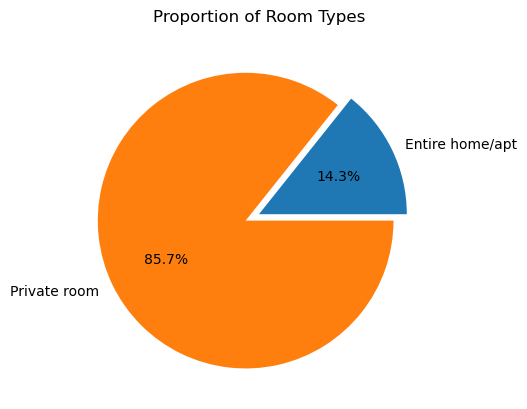

In [33]:
explode=[0.0,0.1]

plt.pie(data_name, labels=data_name.index, autopct='%1.1f%%',explode=explode)
plt.title('Proportion of Room Types')
plt.show()


# **Comparison of data with NaN values in the "name" column with the overall data**


In [34]:
data_nan_930=(data[(data['price']<=930)&(data['neighbourhood']=='Ratchathewi')&(data['room_type']=='Private room')])
data_normal=(data[(data['room_type']=='Private room')|(data['neighbourhood']=='Ratchathewi')])

# Create Table of Comparison
comparison_table = pd.DataFrame({
    'Data Type': ['data_nan_930', 'data_normal'],
    'Total of Property': [len(data_nan_930), len(data_normal)]
})

display(comparison_table)

,Data Type,Total of Property
0,data_nan_930,69
1,data_normal,6555


Information:

1. There are only 69 accommodations out of a total of 6555 properties with prices lower than or equal to 930 baht.
2. Ratchathewi is located in the center of Bangkok and is known for famous shopping centers such as Siam Paragon and MBK Center, as well as leading educational institutions like Chulalongkorn University. Information was obtained [here](https://www.sansiri.com/cnt/news/phaya-thai-ratchathewi-a-vibrant-town-in-the-centre-of-bangkok-267/).


ANALYSIS

- In properties that do not have a name, there is one property that still has reviews. This indicates that even though it doesn't have a name, its relatively low price in that area still attracts interest and gains trust from potential renters, making them willing to book it.
- However, for the other 6 accommodations, they are not attractive to renters at all due to their higher prices and locations outside the city center. Moreover, the lack of a property name further lowers the level of trust to rent those properties.


# **3. Accommodations with availability 0, which means they cannot be rented**


In [35]:
data_availability_0=data[(data['availability_365']==0)&(data['last_review'].notnull())]
display(data_availability_0)
display(f'The total number of properties with availability 0 is {(data_availability_0["id"].count())}')

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,last_review (Year)
51,1019241,Chic two bedroom for Monthly rental,3323622,Phoebe,Bang Rak,13.72687,100.52725,Entire home/apt,2701,30,104,2020-02-20,0.89,1,0,0,2020-01-01
61,1041976,Long-stay special rate spacious entire floor Siam,5735895,Pariya,Parthum Wan,13.74814,100.52016,Entire home/apt,2900,1125,295,2021-08-21,2.61,3,0,0,2021-01-01
104,527553,"Beautiful Apt @ Ratchayothin BTS, Free Wifi",2592798,Nokina,Chatu Chak,13.82841,100.57103,Entire home/apt,1004,2,24,2018-07-22,0.19,2,0,0,2018-01-01
141,1244333,"Private Room@Chatuchak,BTS,JJ market,DMK airport",2087671,Apipu,Phaya Thai,13.79221,100.54631,Private room,399,1,33,2020-03-15,0.78,1,0,0,2020-01-01
152,1316688,Contemporary Modern Duplex - Thonglor,5394070,Eva,Khlong Toei,13.72242,100.57962,Entire home/apt,1489,30,81,2022-10-07,0.72,1,0,3,2022-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14300,728741646918472189,"Lux Studio in High-Rise BKK, Gym&Spa w/Breakfast",26620868,Gilles,Vadhana,13.72419,100.58688,Entire home/apt,1190,2,1,2022-10-24,0.45,34,0,1,2022-01-01
14322,729626149936269321,"Embassies Area, close to BTS, breakfast included",26620868,Gilles,Khlong Toei,13.73673,100.55583,Entire home/apt,1190,2,1,2022-11-14,0.67,34,0,1,2022-01-01
14348,730341564629399745,"Studio near Asok BTS and Malls, Breakfast incl.",26620868,Gilles,Khlong Toei,13.73454,100.56192,Entire home/apt,1190,2,1,2022-11-03,0.54,34,0,1,2022-01-01
14349,730351763605367908,"Pop Double, Terminal 21-Sukhumvit, w/ Breakfast",26620868,Gilles,Khlong Toei,13.73401,100.55977,Entire home/apt,1190,1,1,2022-10-10,0.37,34,0,1,2022-01-01


'The total number of properties with availability 0 is 601'

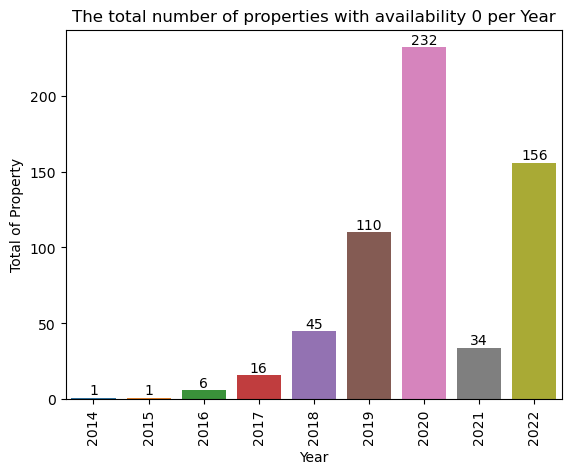

In [36]:
data_review_month = data_availability_0.groupby(data_availability_0['last_review'].dt.year)['number_of_reviews'].size()
data_review_month = data_review_month.reset_index()

data_review_month['last_review'] = pd.to_datetime(data_review_month['last_review'], format='%Y')

ax= sns.barplot(data=data_review_month,
            x=data_review_month['last_review'].dt.year,
            y='number_of_reviews',
            estimator=np.sum,
            ci=None)

plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Total of Property')
plt.title('The total number of properties with availability 0 per Year')


# Add labels to each bar
for index, row in data_review_month.iterrows():
    ax.text(row.name, row.number_of_reviews, str(row.number_of_reviews), ha='center', va='bottom')

plt.show()

**Analysis**

Over the years, there has been an increase in the number of properties that cannot be rented, with the peak in 2020 when the COVID virus started to enter Thailand. During this time, to reduce the spread and fear of infection, many property owners chose not to rent out their properties. However, in 2022, when the COVID situation had improved significantly, there are still many properties that cannot be rented, and the quantity is even higher than in 2021.


# 4. Analysis of the Decrease in the Number of Reviews.


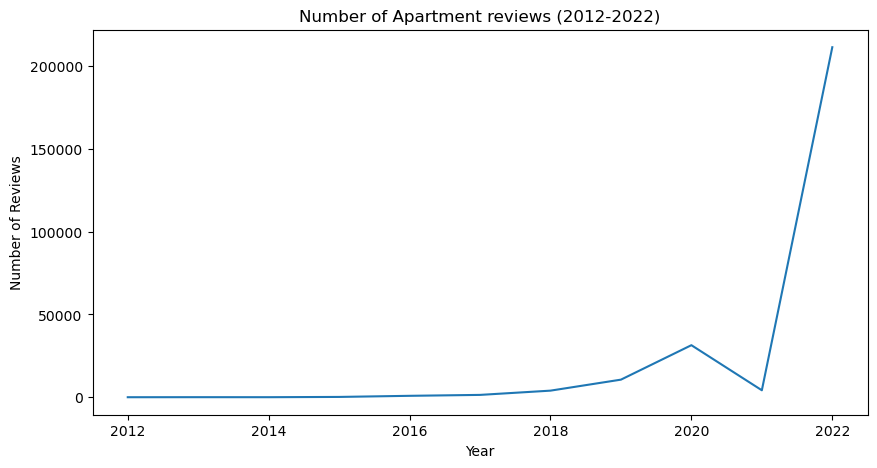

In [37]:
plt.figure(figsize=(10,5))
reviews_per_year = data.groupby(data['last_review'].dt.year)['number_of_reviews'].sum()
reviews_per_year.plot(x=reviews_per_year.index, y=reviews_per_year.values)
plt.title('Number of Apartment reviews (2012-2022)')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.show()

**Using Supporting Data (Number of Visitors to Thailand in 2019-2023)**


In [38]:
import pandas as pd

# Make sure the CSV file path is specified correctly based on your dataset location in Kaggle
file_path ='/kaggle/input/thailand-domestic-tourism-statistics/thailand_domestic_tourism_2019_2023.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the data has been loaded correctly
print(df.head())


         date    province_thai               province_eng region_thai  \
0  2019-01-01    กรุงเทพมหานคร                    Bangkok     ภาคกลาง   
1  2019-01-01           ลพบุรี                   Lopburi      ภาคกลาง   
2  2019-01-01  พระนครศรีอยุธยา  Phra Nakhon Si Ayutthaya      ภาคกลาง   
3  2019-01-01          สระบุรี                  Saraburi      ภาคกลาง   
4  2019-01-01           ชัยนาท                   Chainat      ภาคกลาง   

  region_eng        variable  value  
0    central  occupancy_rate  93.37  
1    central  occupancy_rate  61.32  
2    central  occupancy_rate  73.37  
3    central  occupancy_rate  67.33  
4    central  occupancy_rate  79.31  


**Information on Labels in the Variable Columns**

_Variable is The 8 type of data being recorded, such as the number of tourists or the occupancy rate_.

- no_tourist_all : The total number of domestic tourists who visited the province
- no_tourist_foreign : The number of foreign tourists who visited the province
- no_tourist_occupied : The total number of occupied hotel rooms in the province
- no_tourist_thai : The number of Thai tourists who visited the province
- occupancy_rate : The percentage of occupied travel accommodation in the province
- revenue_all : The revenue generated by the tourism industry in the province, in Thai Baht
- revenue_foreign : The revenue generated by foreign tourists in the province, in Thai Baht
- revenue_thai : The revenue generated by Thai tourists in the province, in Thai Baht


In [39]:
#Checking Data type per Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30800 entries, 0 to 30799
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30800 non-null  object 
 1   province_thai  30800 non-null  object 
 2   province_eng   30800 non-null  object 
 3   region_thai    30800 non-null  object 
 4   region_eng     30800 non-null  object 
 5   variable       30800 non-null  object 
 6   value          30800 non-null  float64
dtypes: float64(1), object(6)
memory usage: 1.6+ MB


In [40]:
#Checking missing value
df.isna().sum()

date             0
province_thai    0
province_eng     0
region_thai      0
region_eng       0
variable         0
value            0
dtype: int64

In [41]:
#Creating a new dataframe, only selecting the province of Bangkok.
df_bangkok=df[(df['province_eng']=='Bangkok')&((df['variable']=='no_tourist_thai')|(df['variable']=='no_tourist_foreign'))]
df_bangkok

#Selecting variables "no_tourist_thai" and "no_tourist_foreign" because in this data, we are only interested in knowing the total number of visitors who visited the province of Bangkok.
# Therefore, other variables are disregarded.

,date,province_thai,province_eng,region_thai,region_eng,variable,value
11550,2019-01-01,กรุงเทพมหานคร,Bangkok,ภาคกลาง,central,no_tourist_thai,3534061.0
11627,2020-01-01,กรุงเทพมหานคร,Bangkok,ภาคกลาง,central,no_tourist_thai,3573040.0
11704,2021-01-01,กรุงเทพมหานคร,Bangkok,ภาคกลาง,central,no_tourist_thai,1632693.0
11781,2022-01-01,กรุงเทพมหานคร,Bangkok,ภาคกลาง,central,no_tourist_thai,2299906.0
11858,2023-01-01,กรุงเทพมหานคร,Bangkok,ภาคกลาง,central,no_tourist_thai,2749877.0
...,...,...,...,...,...,...,...
18865,2022-11-01,กรุงเทพมหานคร,Bangkok,ภาคกลาง,central,no_tourist_foreign,1627034.0
18942,2019-12-01,กรุงเทพมหานคร,Bangkok,ภาคกลาง,central,no_tourist_foreign,2122842.0
19019,2020-12-01,กรุงเทพมหานคร,Bangkok,ภาคกลาง,central,no_tourist_foreign,64261.0
19096,2021-12-01,กรุงเทพมหานคร,Bangkok,ภาคกลาง,central,no_tourist_foreign,159637.0


In [42]:
#Converting the date format to datetime.
# df_bangkok['date']=pd.to_datetime(df_bangkok['date'])

#Create Year Column
df_bangkok['Year']=df_bangkok['date'].apply(lambda x: str(x)[:4])

,Year,value
4,2023,9569732.0
2,2021,12571842.0
1,2020,23617914.0
3,2022,38626450.0
0,2019,66966562.0


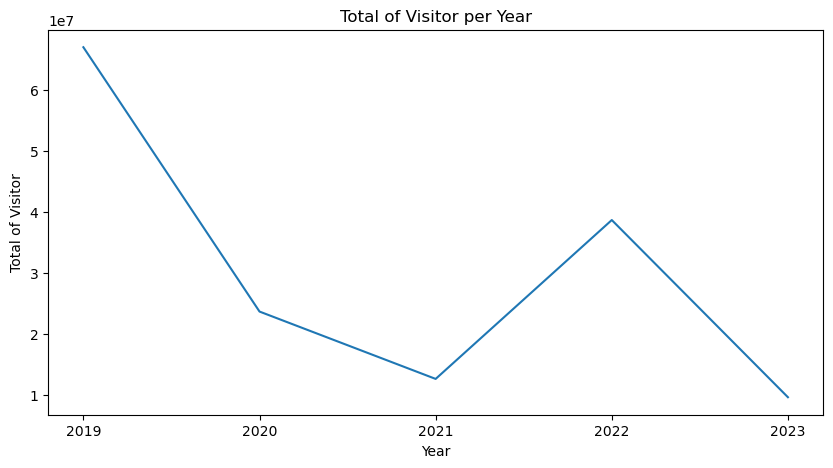

In [43]:
# Trends of visitors to Bangkok from 2019 to 2023
# Grouping visitor data based on year and summing up the number of visitors in each year.

visitors_per_year = df_bangkok.groupby('Year')['value'].sum().reset_index()
display(visitors_per_year.sort_values('value'))

# Plot Total of Visitor per Year
plt.figure(figsize=(10,5))
plt.plot(visitors_per_year['Year'], visitors_per_year['value'])
plt.xlabel('Year')
plt.ylabel('Total of Visitor')
plt.title('Total of Visitor per Year')
plt.show()


# Total of Visitor in 2023


In [44]:
df_bangkok[df_bangkok['Year']=='2023']

,date,province_thai,province_eng,region_thai,region_eng,variable,value,Year
11858,2023-01-01,กรุงเทพมหานคร,Bangkok,ภาคกลาง,central,no_tourist_thai,2749877.0,2023
12243,2023-02-01,กรุงเทพมหานคร,Bangkok,ภาคกลาง,central,no_tourist_thai,2540268.0,2023
15708,2023-01-01,กรุงเทพมหานคร,Bangkok,ภาคกลาง,central,no_tourist_foreign,2122201.0,2023
16093,2023-02-01,กรุงเทพมหานคร,Bangkok,ภาคกลาง,central,no_tourist_foreign,2157386.0,2023


**ANALYSIS**

In the year 2021, there was a significant decrease in the number of reviews written on the Air BnB application. However, after looking at the data on tourists visiting Bangkok each year, it appears that there is a similarity: the number of tourists also decreased each year. This indicates that the decline in reviews in 2021 is not due to a decline in the popularity of Air BnB, but rather because there were very few tourists visiting Bangkok during that year.

Besides the decline in 2021, there is also a decrease in the graph for the year 2023. However, this is not due to a low number of tourists in 2023, but rather because the year 2023 is not yet complete, and the data only records up to February.


# 5. Analysis of Property and Review Counts


<font color='pink'>Note:

In this case, the number of reviews will be assumed to be directly proportional to the number of tourists renting accommodation properties.


**Proportion Total of Property**


In [45]:
data_room=data['room_type'].value_counts()

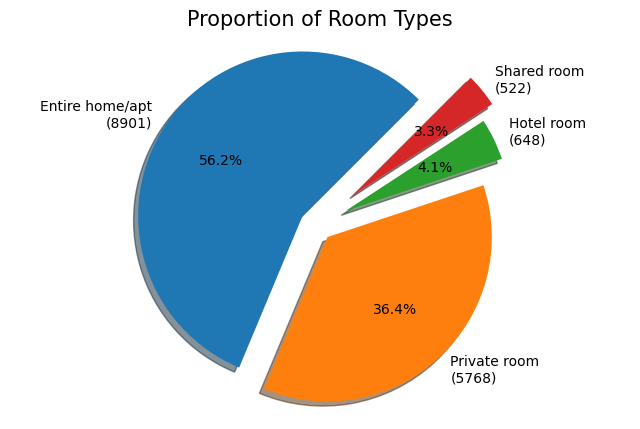

In [46]:
plt.figure(figsize=(8,5))
explode = (0.1, 0.1, 0.2, 0.3)
# Combining the counts per room type into percentage labels.
labels = [f"{room_type}\n({count})" for room_type, count in zip(data_room.index, data_room)]
plt.pie(data_room,
        labels=labels, 
        autopct='%1.1f%%',shadow=bool,explode=explode,startangle = 45)
plt.title('Proportion of Room Types',size=15)
plt.axis('equal')  # Make the pie chart circular
plt.show()

**Proportion of Number of reviews per Room Type**


In [47]:
data_room_type=data.groupby('room_type')[['number_of_reviews']].sum()
# data_room_type.sort_values('number_of_reviews',ascending=False)

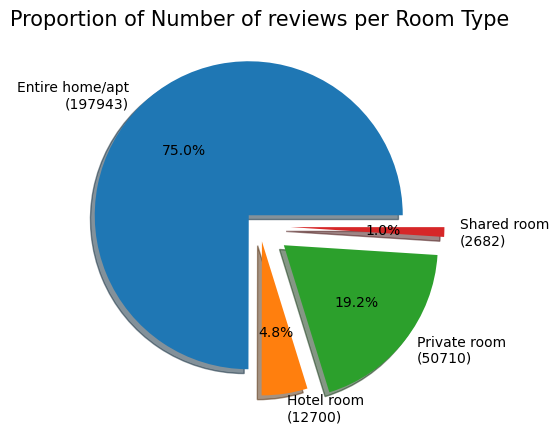

In [48]:
plt.figure(figsize=(8,5))
explode = (0.1, 0.1, 0.2, 0.2)
labels = [f"{number_of_reviews}\n({sum})" for number_of_reviews, sum in zip(data_room_type.index, data_room_type['number_of_reviews'])]
sizes = data_room_type['number_of_reviews'].values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode,shadow=bool)
plt.title('Proportion of Number of reviews per Room Type',size=15)
plt.show()



**ANALYSIS**

It can be observed that the highest number of properties is in the "Apartment/Whole house" category, with 8,901 properties and 197,943 reviews, accounting for 75% of the total reviews for all properties. However, there is something unusual with the "Hotel room" and "Private room" categories. The "Private room" category, with 5,768 properties (36.4%), only has 50,710 reviews (19.2%), and the "Hotel room" category, with 649 properties (4.1%), has 12,700 reviews (4.8%).

The "Private room" category has 9 times more properties than the "Hotel room" category, but it only has 4 times more reviews than the "Hotel room" category.

What could be the reason for having many properties but fewer reviews?


# a. Finding the correlation of "number of reviews" with other columns.


**CHECKING NORMALITY**


In [49]:
statistic, p_value = stats.shapiro(data['price'])
print(f'Statistict Value: {statistic},nilai p_value: {p_value}')

Statistict Value: 0.04443693161010742,nilai p_value: 0.0


**CHECKING CORRELATION**


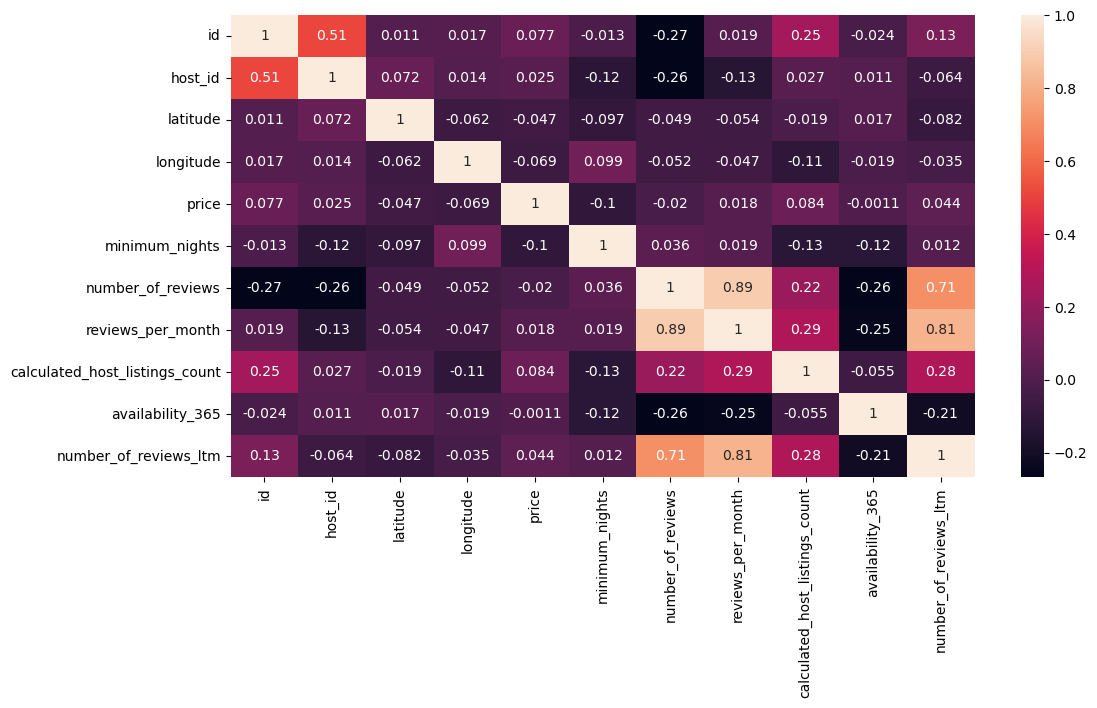

In [50]:
# Identify columns with non-numeric data (e.g., 'column_with_non_numeric_data')
non_numeric_columns = data.select_dtypes(exclude=['float64', 'int64']).columns

# Drop columns with non-numeric data from the DataFrame
data_numeric = data.drop(columns=non_numeric_columns)

# Calculate the correlation matrix for the numeric DataFrame
corr = data_numeric.corr(method='spearman')

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True)
plt.show()


After checking the correlation values of "number of reviews" with other columns, it turns out that the ones with high correlation are only related to reviews, namely "reviews per month" and "number of reviews ltm" (long-term memory). Apart from these, there are no other significant correlations. That's why knowing the correlation using statistical methods may not be applicable. Therefore, the next analysis will focus on finding correlations of "number of reviews" based on domain knowledge.


# Trends in the Number of Reviews per Property Type Each Year


In [51]:
years1 = ['2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01'] 
data_review_month1 = data[data['last_review (Year)'].isin(years1)]
data_review_month1 = data_review_month1.groupby(['last_review (Year)', 'room_type'])[['number_of_reviews']].sum()
display(data_review_month1)

years2=['2017-01-01', '2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01']
data_review_month2 = data[data['last_review (Year)'].isin(years2)]
data_review_month2 = data_review_month2.groupby(['last_review (Year)', 'room_type'])[['number_of_reviews']].sum()
display(data_review_month2)

years3=['2022-01-01']
data_review_month3 = data[data['last_review (Year)'].isin(years3)]
data_review_month3 = data_review_month3.groupby(['last_review (Year)', 'room_type'])[['number_of_reviews']].sum()
display(data_review_month3)

number_of_reviews
last_review (Year) room_type                         
2012-01-01         Entire home/apt                  4
2013-01-01         Entire home/apt                 28
                   Private room                     2
2014-01-01         Entire home/apt                  4
                   Private room                    12
2015-01-01         Entire home/apt                 91
                   Private room                    88
                   Shared room                      3
2016-01-01         Entire home/apt                624
                   Hotel room                       3
                   Private room                   205
                   Shared room                     20

number_of_reviews
last_review (Year) room_type                         
2017-01-01         Entire home/apt                843
                   Hotel room                      38
                   Private room                   442
                   Shared room                     84
2018-01-01         Entire home/apt               2446
                   Hotel room                     128
                   Private room                  1280
                   Shared room                    124
2019-01-01         Entire home/apt               5333
                   Hotel room                     897
                   Private room                  3840
                   Shared room                    546
2020-01-01         Entire home/apt              19682
                   Hotel room                    2259
                   Private room                  8870
                   Shared room                    612
2021-01-01         Entire home/apt               3770
                   Hotel room                     168
                   Private room                   256
                   Shared room                      5

number_of_reviews
last_review (Year) room_type                         
2022-01-01         Entire home/apt             165118
                   Hotel room                    9207
                   Private room                 35715
                   Shared room                   1288

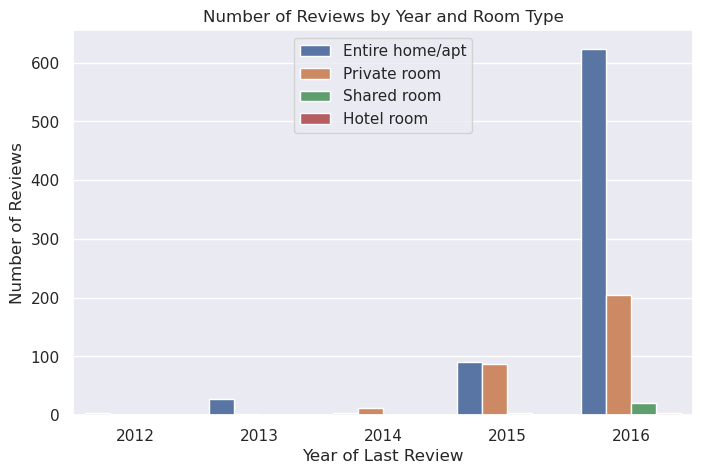

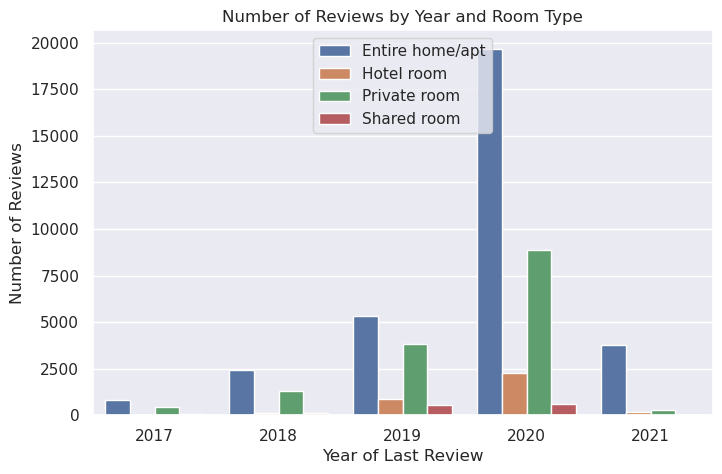

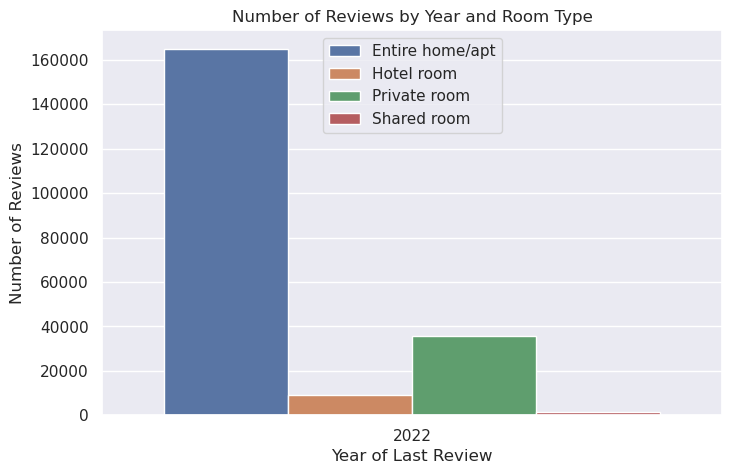

In [52]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 5))

data_review_month1.reset_index(inplace=True)

sns.barplot(x=data_review_month1['last_review (Year)'].dt.year,
            y="number_of_reviews",
            hue="room_type",
            data=data_review_month1)
plt.title("Number of Reviews by Year and Room Type")
plt.xlabel("Year of Last Review")
plt.ylabel("Number of Reviews")
plt.legend(loc='upper center')

plt.show()

sns.set(style="darkgrid")
plt.figure(figsize=(8, 5))

data_review_month2.reset_index(inplace=True)

sns.barplot(x=data_review_month2['last_review (Year)'].dt.year,
            y="number_of_reviews",
            hue="room_type",
            data=data_review_month2)
plt.title("Number of Reviews by Year and Room Type")
plt.xlabel("Year of Last Review")
plt.ylabel("Number of Reviews")
plt.legend(loc='upper center')

plt.show()

sns.set(style="darkgrid")
plt.figure(figsize=(8, 5))

data_review_month3.reset_index(inplace=True)

sns.barplot(x=data_review_month3['last_review (Year)'].dt.year,
            y="number_of_reviews",
            hue="room_type",
            data=data_review_month3)
plt.title("Number of Reviews by Year and Room Type")
plt.xlabel("Year of Last Review")
plt.ylabel("Number of Reviews")
plt.legend(loc='upper center')

plt.show()



In the trend of the number of reviews per year, from 2018 to 2019, the number of reviews for "Apartment" and "Private room" properties showed a similar trend. However, starting from 2020, the number of reviews for "Apartment" properties skyrocketed, and it reached its peak in 2022, surpassing "Private room" and other property types significantly.

What could have happened in 2022 that caused "Apartment" properties to have an overwhelming number of reviews?

Despite having only 1.5 times more properties than "Private room," the number of reviews for "Apartment" properties in 2022 far surpassed those for "Private room."


# Analysis of Room Availability and the Number of Reviews Obtained


**PRIVATE ROOM**


In [53]:
count_with_availability_P = df_private[df_private["availability_365"] != 0]["id"].count()
count_with_reviews_P = df_private[(df_private["availability_365"] != 0) & (df_private["number_of_reviews"] != 0)]["id"].count()

# Create Table of Comparison
comparison_table = pd.DataFrame({
    'Data Type': ['Properties available for rent', 'Properties that received reviews'],
    'Total of Property': [count_with_availability_P, count_with_reviews_P]
})

display(comparison_table)


,Data Type,Total of Property
0,Properties available for rent,5519
1,Properties that received reviews,2696


**APARTEMENT**


In [54]:
count_with_availability_A= df_apart[(df_apart["availability_365"]!=0)]["id"].count()
count_with_reviews_A = df_apart[(df_apart["availability_365"]!=0)&(df_apart["number_of_reviews"]!=0)]["id"].count()

# Create Table of Comparison
comparison_table = pd.DataFrame({
    'Data Type': ['Properties available for rent', 'Properties that received reviews'],
    'Total of Property': [count_with_availability_A, count_with_reviews_A]
})

display(comparison_table)


,Data Type,Total of Property
0,Properties available for rent,8404
1,Properties that received reviews,6180


**HOTEL ROOM**


In [55]:
count_with_availability_H= df_hotel[(df_hotel["availability_365"]!=0)]["id"].count()
count_with_reviews_H = df_hotel[(df_hotel["availability_365"]!=0)&(df_hotel["number_of_reviews"]!=0)]["id"].count()

# Create Table of Comparison
comparison_table = pd.DataFrame({
    'Data Type': ['Properties available for rent', 'Properties that received reviews'],
    'Total of Property': [count_with_availability_H, count_with_reviews_H]
})

display(comparison_table)


,Data Type,Total of Property
0,Properties available for rent,567
1,Properties that received reviews,390


**SHARED ROOM**


In [56]:
count_with_availability_S= df_shared[(df_shared["availability_365"]!=0)]["id"].count()
count_with_reviews_S = df_shared[(df_shared["availability_365"]!=0)&(df_shared["number_of_reviews"]!=0)]["id"].count()

# Create Table of Comparison
comparison_table = pd.DataFrame({
    'Data Type': ['Properties available for rent', 'Properties that received reviews'],
    'Total of Property': [count_with_availability_S, count_with_reviews_S]
})

display(comparison_table)


,Data Type,Total of Property
0,Properties available for rent,507
1,Properties that received reviews,197


In [57]:
data.isna().sum()

id                                   0
name                                 7
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5775
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
last_review (Year)                5775
dtype: int64

**PROPORTION OF TOTAL OF PROPERTY AND TOTAL OF REVIEW**


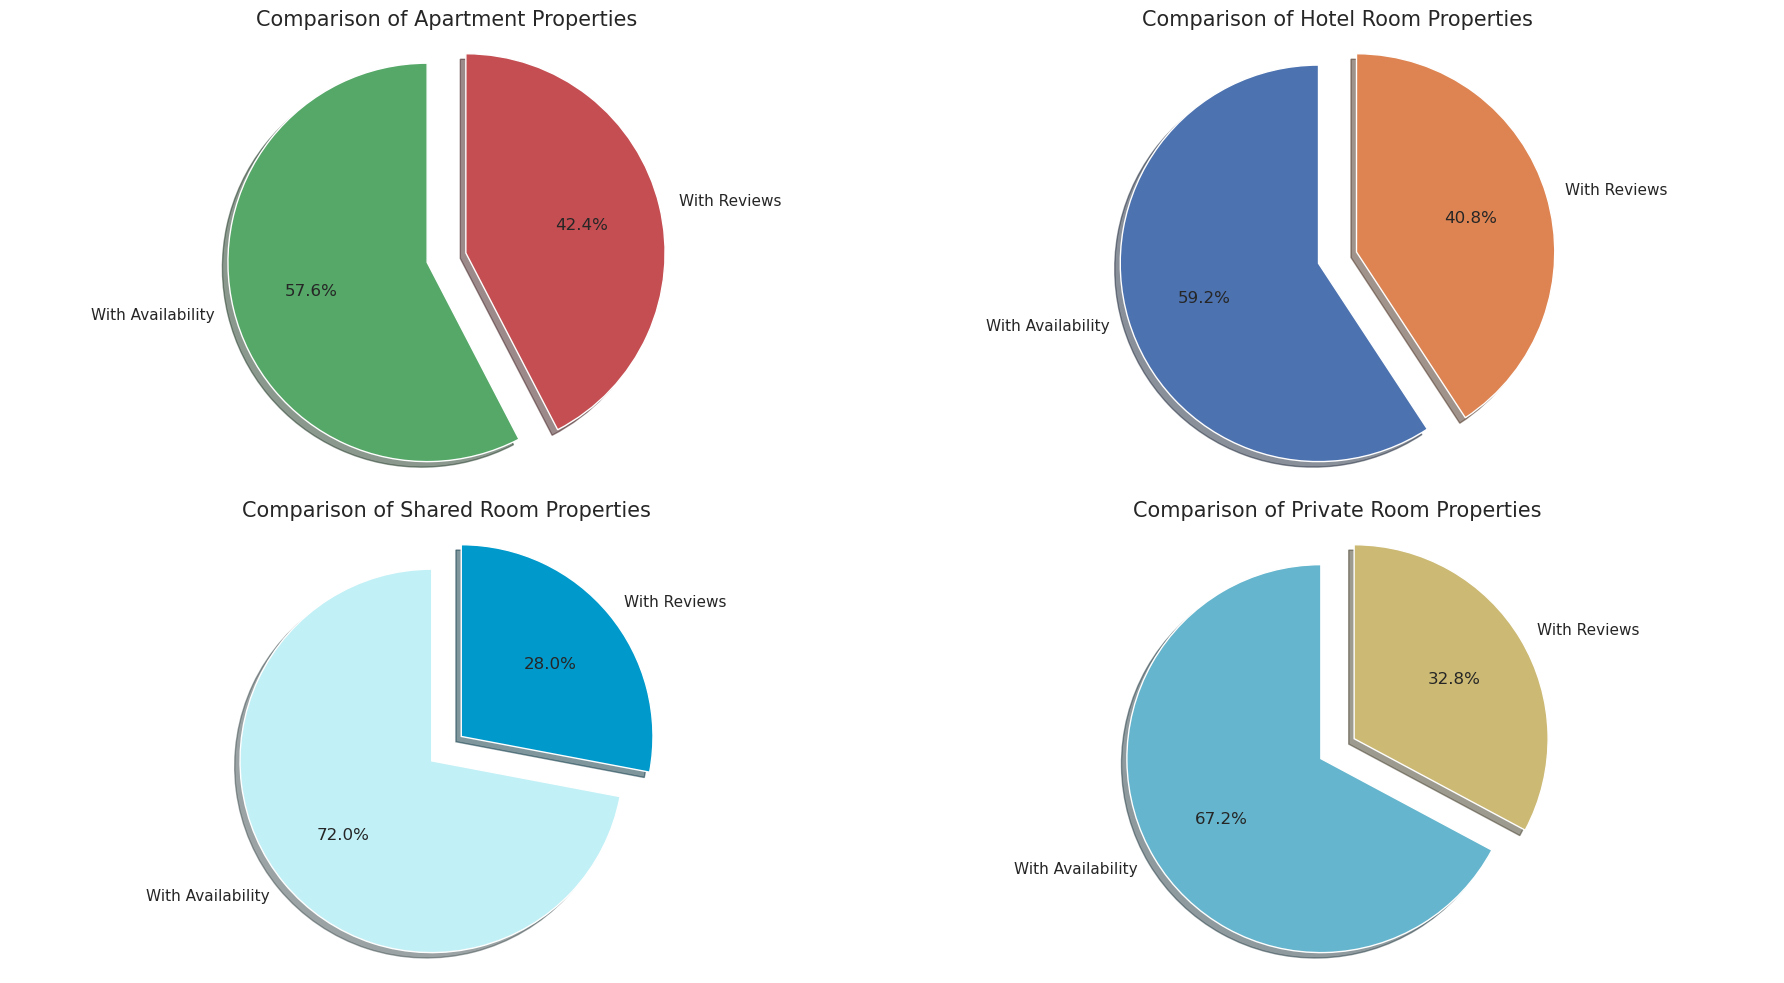

In [58]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))

# Grafik 1
labels = ['With Availability', 'With Reviews']
counts = [count_with_availability_A, count_with_reviews_A]
explode = [0.1, 0.1]

plt.subplot(2, 2, 1)  # Creating the first subplot with 2 rows, 2 columns, and index 1.
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, explode=explode, shadow=True, colors='green')
plt.title("Comparison of Apartment Properties",size=15)
plt.axis('equal')

# Grafik 2
labels = ['With Availability', 'With Reviews']
counts = [count_with_availability_H, count_with_reviews_H]
explode = [0.1, 0.1]

plt.subplot(2, 2, 2)  # Creating the first subplot with 2 rows, 2 columns, and index 2.
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, explode=explode, shadow=True)
plt.title("Comparison of Hotel Room Properties",size=15)
plt.axis('equal')

# Grafik 3
labels = ['With Availability', 'With Reviews']
counts = [count_with_availability_S, count_with_reviews_S]
explode = [0.1, 0.1]
cols = ['#C1F0F6', '#0099CC']

plt.subplot(2, 2, 3)  # Creating the first subplot with 2 rows, 2 columns, and index 3.
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, explode=explode, shadow=True, colors=cols)
plt.title("Comparison of Shared Room Properties",size=15)
plt.axis('equal')

# Grafik 4
labels = ['With Availability', 'With Reviews']
counts = [count_with_availability_P, count_with_reviews_P]
explode = [0.1, 0.1]

plt.subplot(2, 2, 4)  # Creating the first subplot with 2 rows, 2 columns, and index 4.
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, explode=explode, shadow=True, colors='cyan')
plt.title("Comparison of Private Room Properties",size=15)
plt.axis('equal')

plt.tight_layout()  # Adjusting the layout of the subplot.
plt.show()


In [59]:
data

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,last_review (Year)
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0,2020-01-01
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaT,0.00,2,358,0,NaT
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaT,0.00,1,365,0,NaT
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1,2022-01-01
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaT,0.00,3,365,0,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaT,0.00,1,362,0,NaT
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaT,0.00,14,365,0,NaT
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaT,0.00,14,365,0,NaT
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaT,0.00,14,365,0,NaT


**ANALYSIS**

From the above graph, it can be observed that properties with the room types "Private room" and "Shared room" have relatively low proportions in terms of the number of reviews compared to the total number of properties.

- Properties with the room type "Private room" only received reviews for about 32.8% of the total properties. This means that only around 1/3 of all "Private room" properties received reviews.
- Properties with the room type "Shared room" only received reviews for about 28% of the total properties. This means that almost only 1/4 of all "Shared room" properties received reviews.


# Analysis of Length of Stay


**APARTEMENT**


In [60]:
df_apart[(df_apart["availability_365"]!=0)&(df_apart["number_of_reviews"]!=0)].groupby('minimum_nights').agg({'id': 'count', 'number_of_reviews': 'sum'}).nlargest(10, 'id')


,id,number_of_reviews
minimum_nights,,
1,2115,80836
2,936,33126
30,606,14192
3,564,17002
28,356,8644
7,255,4580
5,254,5834
14,115,2950
4,105,3758


**PRIVATE ROOM**


In [61]:
df_private[(df_private["availability_365"]!=0)&(df_private["number_of_reviews"]!=0)].groupby('minimum_nights').agg({'id': 'count', 'number_of_reviews': 'sum'}).nlargest(10, 'id')

,id,number_of_reviews
minimum_nights,,
1,1862,34934
2,295,8380
30,155,1185
3,109,1159
7,67,450
5,34,288
4,30,491
14,23,180
28,22,322


**SHARED ROOM**


In [62]:
df_shared[(df_shared["availability_365"]!=0)&(df_shared["number_of_reviews"]!=0)].groupby('minimum_nights').agg({'id': 'count', 'number_of_reviews': 'sum'}).nlargest(10, 'id')

,id,number_of_reviews
minimum_nights,,
1,184,2422
2,10,216
3,1,1
5,1,13
7,1,4


**HOTEL ROOM**


In [63]:
df_hotel[(df_hotel["availability_365"]!=0)&(df_hotel["number_of_reviews"]!=0)].groupby('minimum_nights').agg({'id': 'count', 'number_of_reviews': 'sum'}).nlargest(10, 'id')

,id,number_of_reviews
minimum_nights,,
1,358,10607
2,18,718
28,6,159
3,4,7
5,2,60
60,1,1
113,1,94


**ANALYSIS**

From the provided data, it can be observed that properties with the highest number of reviews are those with a minimum stay duration of 1 day. These properties are typically chosen by transit tourists or those who are uncertain about their accommodation choices. In this case, if they feel uncomfortable, they can easily find alternative accommodation the next day.

The properties that receive the most reviews are apartments or entire homes, with a total of 34,928 reviews. Additionally, there are hotels that, despite having only 358 properties, managed to receive 10,607 reviews. Although private rooms have more reviews compared to hotel rooms, the ratio is not proportional to the number of available properties. There are 1,861 private room properties, but the number of reviews received is not proportionate to that count.

Furthermore, apartments and hotels generally offer more than one bed, allowing travelers to rent such accommodations with several friends, which can help divide the accommodation costs and make it more affordable.

However, properties with shared facilities like shared rooms and private rooms are not as popular as other property types. This could be due to the lack of privacy offered by these types of properties, where facilities have to be shared with strangers.

Statements regarding apartments/entire homes having more comprehensive facilities can be found in the explanations about each property type on the Airbnb website [here](https://www.airbnb.com/help/article/5?locale=en&_set_bev_on_new_domain=1685440442_M2ZmOGRlNGU3MjE4#section-heading-0-0).


# Analysis of Price Differences


**APARTEMENT**


In [64]:
df_apart[(df_apart["availability_365"]!=0)&(df_apart["neighbourhood"]=='Ratchathewi')].describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,6.290000e+02,6.290000e+02,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,2.445033e+17,1.794876e+08,13.752229,100.547857,2138.104928,19.314785,21.523052,0.710445,41.130366,254.804452,5.211447
std,3.388186e+17,1.340020e+08,0.002940,0.011857,1404.073442,41.398015,37.208718,0.958424,69.729657,113.814542,15.250189
min,2.793400e+04,1.204370e+05,13.748330,100.521340,500.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,3.113864e+07,5.216195e+07,13.750070,100.537010,1441.000000,2.000000,0.000000,0.000000,3.000000,149.000000,0.000000
50%,4.156420e+07,1.685941e+08,13.751170,100.554250,1632.000000,3.000000,4.000000,0.380000,12.000000,320.000000,1.000000
75%,6.795402e+17,2.648650e+08,13.754188,100.556390,2527.000000,28.000000,28.000000,1.000000,39.000000,357.000000,5.000000
max,7.894405e+17,4.917528e+08,13.763810,100.564790,17281.000000,365.000000,406.000000,7.830000,228.000000,365.000000,325.000000


**PRIVATE ROOM**


In [65]:
df_private[(df_private["availability_365"]!=0)&(df_private["neighbourhood"]=='Ratchathewi')].describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,3.170000e+02,3.170000e+02,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000
mean,1.679577e+17,1.947650e+08,13.754146,100.537869,5141.400631,6.466877,11.905363,0.338233,9.447950,282.082019,2.981073
std,3.072811e+17,1.340166e+08,0.003141,0.008285,29657.079747,32.664719,25.191869,0.671597,11.157161,104.601956,7.267904
min,8.117871e+06,1.161904e+06,13.748290,100.521350,420.000000,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000
25%,2.497509e+07,6.974862e+07,13.751870,100.532260,1113.000000,1.000000,0.000000,0.000000,2.000000,178.000000,0.000000
50%,3.504244e+07,1.888174e+08,13.753706,100.537374,1443.000000,1.000000,1.000000,0.030000,6.000000,345.000000,0.000000
75%,4.351985e+07,2.709290e+08,13.755850,100.540580,2229.000000,1.000000,8.000000,0.320000,11.000000,364.000000,2.000000
max,7.904768e+17,4.915262e+08,13.764260,100.564072,300000.000000,365.000000,176.000000,6.120000,53.000000,365.000000,61.000000


**SHARED ROOM**


In [66]:
df_shared[(df_shared["availability_365"]!=0)&(df_shared["neighbourhood"]=='Ratchathewi')].describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,6.000000e+01,6.000000e+01,60.000000,60.000000,60.000000,60.0,60.000000,60.000000,60.000000,60.000000,60.000000
mean,1.085392e+16,1.184864e+08,13.753495,100.534397,1056.400000,1.0,8.650000,0.118500,11.666667,319.566667,0.550000
std,8.407411e+16,1.018858e+08,0.002085,0.004112,2809.132776,0.0,18.903703,0.211955,7.899081,73.970990,1.407305
min,4.123832e+06,7.472382e+06,13.748860,100.529300,346.000000,1.0,0.000000,0.000000,1.000000,88.000000,0.000000
25%,1.468979e+07,5.678285e+07,13.752120,100.531240,400.000000,1.0,0.000000,0.000000,6.000000,242.000000,0.000000
50%,2.864507e+07,6.783628e+07,13.752840,100.532465,477.500000,1.0,0.500000,0.010000,10.500000,362.000000,0.000000
75%,3.357527e+07,2.039112e+08,13.754385,100.536853,500.000000,1.0,9.250000,0.140000,14.250000,365.000000,1.000000
max,6.512352e+17,4.647000e+08,13.760090,100.547150,20895.000000,1.0,105.000000,1.080000,24.000000,365.000000,8.000000


**HOTEL ROOM**


In [67]:
df_hotel[(df_hotel["availability_365"]!=0)&(df_hotel["neighbourhood"]=='Ratchathewi')].describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,5.800000e+01,5.800000e+01,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,2.787825e+07,1.711487e+08,13.755110,100.537249,6872.551724,1.500000,35.862069,0.527931,9.482759,315.741379,3.189655
std,8.786736e+06,8.749196e+07,0.003749,0.006915,39186.517295,3.550389,61.035063,0.796161,6.537990,63.810454,10.908643
min,9.402281e+06,3.090854e+07,13.749020,100.522330,400.000000,1.000000,0.000000,0.000000,1.000000,94.000000,0.000000
25%,2.342896e+07,5.954621e+07,13.753245,100.531075,986.000000,1.000000,1.000000,0.020000,3.000000,317.750000,0.000000
50%,3.107492e+07,1.819477e+08,13.753740,100.538210,1497.000000,1.000000,8.000000,0.180000,9.000000,335.500000,0.000000
75%,3.547496e+07,2.616682e+08,13.758007,100.542412,2066.750000,1.000000,48.250000,0.670000,17.000000,357.750000,2.000000
max,3.630689e+07,2.668982e+08,13.763980,100.554950,300000.000000,28.000000,261.000000,3.120000,24.000000,365.000000,79.000000


# Analysis

The following is an analysis of the data on price ranges for four types of rentable properties in the popular area of Ratchathewi:

1. Apartments: There are 629 apartment accommodations with a price range from a minimum of 500 baht to a maximum of 17,281 baht. When looking at the mean and median, there is a difference of only 500 baht, which is approximately 200,000 rupiahs.

2. Private Rooms: There are 316 private room accommodations with a price range from a minimum of 420 baht to a maximum of 300,000 baht. However, there is a significant difference between the mean and median, amounting to 3,711 baht or approximately 1.6 million rupiahs. This indicates that the prices for private rooms have a wide range.

3. Shared Rooms: There are 60 shared room accommodations with a price range from a minimum of 345 baht to a maximum of 20,895 baht. The price difference is not too large, amounting to 579 baht or approximately 500,000 rupiahs, from the mean of 1,056 baht and median of 477 baht.

4. Hotel Rooms: There are 58 hotel room accommodations with a price range from a minimum of 400 baht to a maximum of 300,000 baht. There is a considerable price difference of 5,375 baht or approximately 2.3 million rupiahs between the mean of 6,872 baht and median of 1,497 baht.

Based on the median and mean values, apartments and shared rooms have price ranges that are not too far apart for the same property type. Meanwhile, hotel rooms and private rooms have significantly different price ranges for the same property type.

The analysis aims to provide an overview of the price variations for different property types in the Ratchathewi area.


---


# CONCLUSION


1. There are several properties that are registered multiple times with different host names. This can be identified through similarities in the property name, geographic coordinates (latitude and longitude), price, room type, and last review. This situation results in the same property being booked by two or more people on the same dates, causing overlapping reservations. In this case, renters who have made a reservation and paid the rental price may encounter problems when arriving at the destination as the property is already occupied.

2. The absence of property names significantly affects the level of trust of potential renters. This is evident from 7 accommodations that do not have a name, where 6 of them have not received any reviews at all. The absence of a name on these properties gives a negative impression on potential renters and can influence their decision to rent. Potential renters may assume that the property is not trustworthy or even suspected to be fake.

   However, 1 accommodation that received a review has a relatively cheaper price compared to other properties of the same type and location. Therefore, despite the low level of trust in the property, the more affordable price may be a factor influencing the renter's decision.

3. The number of properties that cannot be rented increased from year to year, reaching its peak in 2021. This increase occurred mainly after Thailand confirmed the presence of the coronavirus in January 2021. However, despite the pandemic situation of Covid-19 beginning to ease in 2022, there are still many properties that cannot be rented. In fact, the number of properties that cannot be rented in 2022 is even higher than in 2021.

4. The decrease in the number of reviews in 2021 was influenced by the decrease in the number of tourists visiting Thailand. Therefore, it is not due to the declining popularity of Airbnb, but rather the low number of visitors in 2021 due to the impact of Covid-19, leading to lockdown policies in various countries.

5. The number of reviews has a significant impact on the Airbnb company and property owners because reviews provide information about the previous renters' experiences and give an overview of the quality of the offered properties. This allows for evaluation of any shortcomings. The number of reviews in this case will be considered directly proportional to the number of tourists, as both are influenced by the following factors:

   - The influence of property facilities and minimum night on tourists' decisions to stay and provide reviews

     Tourists tend to choose to stay in apartments or hotels for short periods. This is because apartments and hotels provide separate spaces, such as bedrooms, living rooms, and kitchens. By staying in an apartment or hotel, tourists do not need to share spaces or facilities with other strangers, ensuring more privacy.

   - Differences in property price ranges

     Apartments and shared rooms have relatively similar price ranges within the same property type. On the other hand, hotel rooms and private rooms have significantly different price ranges within the same property type. Tourists can use this information to consider their preferences, such as the level of comfort and desired facilities, before making a decision about accommodation. If the price range is not too far between similar properties, tourists will find it easier to choose accommodation that suits their needs and budget.


---


# RECOMENDATION


1. During the registration of accommodation listings on the Airbnb application, stricter validation should be implemented to ensure that each property registered is unique and there are no duplications.

2. The Airbnb platform should enforce registration rules that require hosts to provide clear and attractive property names in order to encourage reviews from previous renters.

3. Properties that are not available for rent should be given a suspension and warning. If after a period of 2-3 years the property is still not operational, the application should automatically remove the property from the listing on the Airbnb platform. However, relevant factors such as the property's history, user reviews, and communication with the property owner should be taken into consideration. This step will help maintain the quality and reliability of the services offered by the Airbnb platform.

4. Ways to increase reviews:

   - Promotion: Ensure that the property has sufficient exposure on popular social media platforms such as TikTok and Instagram, and even consider partnering with popular influencers who are known for their travel content. This will increase the visibility of the property and attract more travelers to use Airbnb.

   - Review incentives: Offer incentives to users to encourage them to leave reviews, such as discounts or reward points.

   - Adding facilities: To address properties with limited facilities, such as those with only one bedroom, the property can offer the option to rent additional beds at a reasonable cost.

   - Improving services: For properties with a minimum night requirement of 1 night that receive few reviews, consider adding services like shuttle service, friendly receptionists, and maintaining cleanliness to encourage travelers to leave reviews.

   - Providing refund features: For properties with higher prices, the application can implement a refund feature to ease travelers' concerns about losing a significant amount of money in case of sudden cancellations.
